In [1]:
import requests
import pandas as pd
import json

#Documentation: https://www.alphavantage.co/documentation/#

#sample ticker inputs
ticker_symbols = ["AAPL", "GOOG", "MSFT", "TSLA", "BA"]
bonds_maturity = ["10year", "2year"]
commodities_symbols = ["Brent", "NATURAL_GAS", "COPPER"]
crypto_symbols = ["BTC", "ETH"]

#This function scrapes data for EQUITIES (stocks and ETFs from AlphaVantage)
#Example input parameter: ["QQQ", "SPY", "AAPL", "TSLA", "BA"]
def scrape_equities(tickers):
    data_list = []
    for symb in tickers:
        output = "compact" #compact returns only the latest 100 data points; full returns the full-length time series of 20+ years of historical data. 
        #The "compact" option is recommended if you would like to reduce the data size of each API call.
        func = "TIME_SERIES_DAILY" 

        outputSize = "outputsize=" + output
        function = "function=" + func
        symbol = "symbol=" + symb
        
        url = 'https://www.alphavantage.co/query?' + outputSize + "&" + function + "&" + symbol + "&" + "apikey=ZXVCKXV4Q9WHK3US"
        r = requests.get(url)
        data = r.json()
        data_list.append(data)
    return data_list
    #Sample return data: https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=IBM&apikey=demo

#This function scrapes data of the US Treasury Yield (BONDS)
#Example input parameter: ["10year", "2year"]
def scrape_bonds(maturity):
    data_list = []
    for time in maturity:
        func = "TREASURY_YIELD"
        interval = "daily" #accepts daily, weekly, monthly

        function = "function=" + func
        interval1 = "interval=" + interval
        mature = "maturity=" + time #accepts 3month, 2year, 5year, 7year, 10year, and 30year

        url = "https://www.alphavantage.co/query?" + function + "&" + interval1 + "&" + mature + "&" + "apikey=ZXVCKXV4Q9WHK3US"
        r = requests.get(url)
        data = r.json()
        data_list.append(data)
    return data_list
    #Sample return data: https://www.alphavantage.co/query?function=TREASURY_YIELD&interval=monthly&maturity=10year&apikey=demo

#This function scrapes data of COMMODITIES
#Example input parameter: ["Brent", "NATURAL_GAS", "COPPER"]
def scrape_commodities(commodity):
    data_list = []
    for symb in commodity:
        interval = "daily"

        function = "function=" + symb
        interval1 = "interval=" + interval

        url = "https://www.alphavantage.co/query?" + function + "&" + interval1 + "&" + "apikey=ZXVCKXV4Q9WHK3US"
        r = requests.get(url)
        data = r.json()
        data_list.append(data)
    return data_list
    #sample return data: https://www.alphavantage.co/query?function=BRENT&interval=monthly&apikey=demo

def scrape_crypto(crypto):
    data_list = []
    for symb in crypto:
        func = "DIGITAL_CURRENCY_DAILY"
        market = "USD"

        function = "function=" + func
        symbol = "symbol=" + symb
        market_line = "market=" + market
        
        url = 'https://www.alphavantage.co/query?' + function + "&" + symbol + "&" + market_line + "&" + "apikey=ZXVCKXV4Q9WHK3US"
        r = requests.get(url)
        data = r.json()
        data_list.append(data)
    return data_list

        
#sample function calls, only call one at a time
equities_data = scrape_equities(ticker_symbols)
#bonds_data = scrape_bonds(bonds_maturity)
#commodities_data = scrape_commodities(commodities_symbols)
#crypto_data = scrape_crypto(crypto_symbols)

outputList = []

for json_data in  equities_data:
    symbols = json_data["Meta Data"]["2. Symbol"]
    close_values = [entry["4. close"] for entry in json_data["Time Series (Daily)"].values()]
    output = {
        "symbols": symbols,
        "prices": close_values
    }
    outputList.append(output)

#make sure to run this file before running backtest.py
df = pd.DataFrame({obj['symbols']: [float(price) for price in obj['prices']] for obj in outputList})
df_percentage_change = df.pct_change()
df_percentage_change.to_json('object.json', orient='columns')
print(df_percentage_change)


        AAPL      GOOG      MSFT      TSLA        BA
0        NaN       NaN       NaN       NaN       NaN
1   0.003496 -0.011107 -0.009092  0.006303 -0.012282
2  -0.006609 -0.006524 -0.005991 -0.001626  0.016217
3  -0.012017  0.001760  0.005448  0.016236  0.000419
4  -0.015295 -0.020139 -0.012040 -0.001461 -0.015859
..       ...       ...       ...       ...       ...
95 -0.003480 -0.007289 -0.013043  0.012032  0.022625
96  0.030131 -0.006094  0.009002  0.001710  0.008794
97  0.037122  0.009899  0.002013  0.018141  0.021198
98 -0.001265  0.000658 -0.014660 -0.044758  0.003729
99 -0.008392  0.004020 -0.002738  0.053345  0.002820

[100 rows x 5 columns]


        AAPL      GOOG      MSFT      TSLA        BA
0        NaN       NaN       NaN       NaN       NaN
1   0.003496 -0.011107 -0.009092  0.006303 -0.012282
2  -0.006609 -0.006524 -0.005991 -0.001626  0.016217
3  -0.012017  0.001760  0.005448  0.016236  0.000419
4  -0.015295 -0.020139 -0.012040 -0.001461 -0.015859
..       ...       ...       ...       ...       ...
95 -0.003480 -0.007289 -0.013043  0.012032  0.022625
96  0.030131 -0.006094  0.009002  0.001710  0.008794
97  0.037122  0.009899  0.002013  0.018141  0.021198
98 -0.001265  0.000658 -0.014660 -0.044758  0.003729
99 -0.008392  0.004020 -0.002738  0.053345  0.002820

[100 rows x 5 columns]


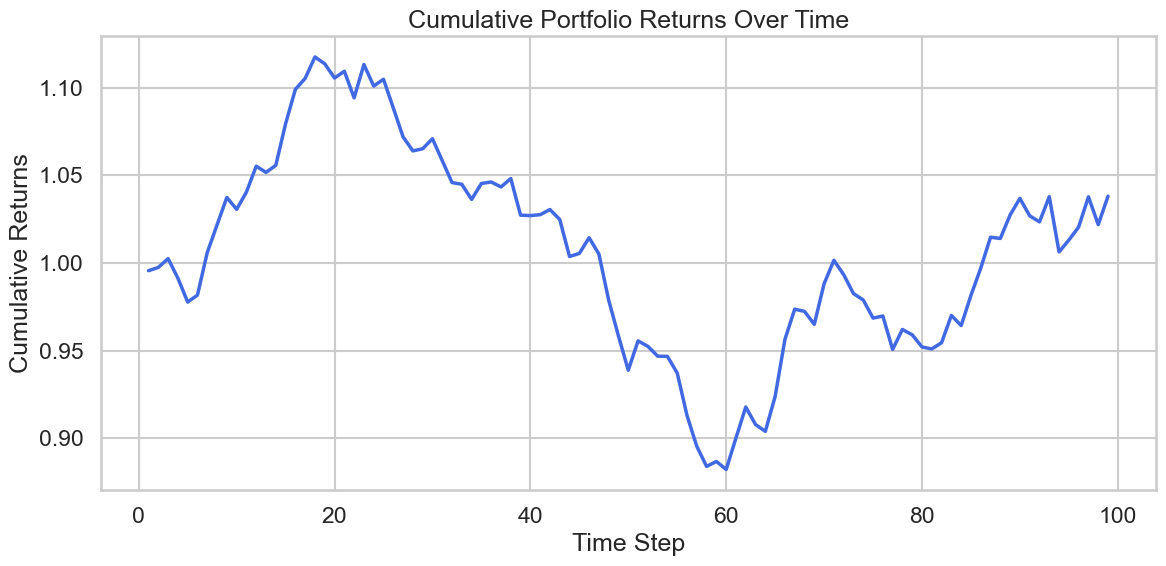

Sharpe Ratio: -2.2404866969518253
Max Drawdown: -0.2106690474896268
PnL: 0.038147379188871566
Beta: nan


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
from typing import Optional, Union

# from somewhere import scrape_data
# from somewhere import fetch_data

class Backtest:
    def __init__(self, initial_weights: Optional[pd.DataFrame] = None) -> None:
        self.initial_weights = initial_weights
        self.historical_returns = None
        self.results = {}

    def load_data(self, data: Optional[pd.DataFrame] = None, source: Optional[str] = 'database') -> None:
        """
        Load historical data.

        Sample data.
        data = pd.DataFrame({
            'AAPL': [0.01, -0.005, 0.015, -0.01],
            'GOOGL': [0.005, 0.015, -0.01, 0.005],
            'MSFT': [-0.01, 0.005, 0.015, -0.005]
        })

        Parameters:
        - data: User-provided data. If not provided, fetch from source.
        - source: Either 'database' or 'scraper'. Determines where to fetch data if not provided by user.
        """
        if data is not None:
            self.historical_returns = data
        else:
            assets = self.initial_weights.columns.tolist()
            if source == 'scraper':
                pass
                #     self.daily_returns = scrape_data(assets)  # Assuming scrape_data can take a list of assets
            elif source == 'database':
                pass
            #     self.daily_returns = fetch_data(assets)

    def scrape_data(assets):
        NotImplementedError("Function not implemented yet")
        #write the scrappers here such that it returns in the form of Annex A in main class

    def fetch_data(assets):
        NotImplementedError("Function not implemented yet")

    def _calculate_portfolio_returns(self) -> pd.Series:
        """
        Calculate daily portfolio returns based on provided or fetched data and initial weights.
        """
        weights = self.initial_weights.values[0]
        portfolio_returns = self.historical_returns.dot(weights)
        return portfolio_returns

    def _calculate_sharpe(self, risk_free_rate: Optional[float] = 0.03) -> float:
        """
        Calculates Sharpe assuming a risk-free rate of 3%.
        """
        portfolio_returns = self._calculate_portfolio_returns()

        mean_return = portfolio_returns.mean()
        return_std = portfolio_returns.std()

        sharpe_ratio = (mean_return - risk_free_rate) / return_std

        return sharpe_ratio

    def _calculate_max_drawdown(self) -> float:
        portfolio_returns = self._calculate_portfolio_returns()

        # Calculate the cumulative returns
        cumulative_returns = (1 + portfolio_returns).cumprod()
        peak = cumulative_returns.expanding(min_periods=1).max()
        drawdown = (cumulative_returns - peak) / peak

        max_drawdown = drawdown.min()
        return max_drawdown

    def _calculate_pnl(self) -> float:
        portfolio_returns = self._calculate_portfolio_returns()

        # Assuming initial investment is 1 for simplicity
        initial_value = 1
        final_value = initial_value * (1 + portfolio_returns).prod()

        pnl = final_value - initial_value
        return pnl

    def _calculate_beta(self) -> float:
        """
        Calculates beta assuming 'S&P500' is a column in your data for the S&P 500 returns
        """
        if 'S&P500' not in self.historical_returns.columns:
            return np.nan

        market_returns = self.historical_returns['S&P500']
        portfolio_returns = self._calculate_portfolio_returns()
        covariance_matrix = np.cov(portfolio_returns, market_returns)
        beta = covariance_matrix[0, 1] / covariance_matrix[1, 1]
        return beta

    def _plot_portfolio_performance(self, cumulative_returns: pd.Series) -> None:
        """
        Plot cumulative portfolio returns over time.
        """
        sns.set_style("whitegrid")
        sns.set_context("talk")

        # Plotting
        plt.figure(figsize=(12, 6))
        sns.lineplot(data=cumulative_returns, linewidth=2.5, color="royalblue")

        # Setting plot title and labels
        plt.title("Cumulative Portfolio Returns Over Time")
        plt.xlabel("Time Step")
        plt.ylabel("Cumulative Returns")
        plt.tight_layout()

        plt.show()

    def run(self) -> pd.DataFrame:
        """
        Calculate and store various portfolio metrics. Also visualises graph of portfolio returns.
        """
        portfolio_returns = self._calculate_portfolio_returns()
        
        self.results['Portfolio Returns'] = portfolio_returns.tolist()
        self.results['Cumulative Returns'] = (1 + portfolio_returns).cumprod().tolist()
        self.results['Sharpe Ratio'] = self._calculate_sharpe()
        self.results['Max Drawdown'] = self._calculate_max_drawdown()
        self.results['PnL'] = self._calculate_pnl()
        self.results['Beta'] = self._calculate_beta()
        
        self._plot_portfolio_performance(self.results['Cumulative Returns'])

        return self.results

def main():
    df_imported = pd.read_json('object.json', orient='columns')
    print(df_imported)

    #make sure the tickers align with tickers in data-scrapper.py
    initial_weights = pd.DataFrame({
        'AAPL': [0.1],
        'GOOG': [0.1],
        'MSFT': [0.2],
        'TSLA': [0.3],
        'BA': [0.3]
    })

    backtest = Backtest(initial_weights)
    backtest.load_data(df_imported)
    results = backtest.run()

    metrics = ['Sharpe Ratio', 'Max Drawdown', 'PnL', 'Beta']
    for metric in metrics:
        print("{}: {}".format(metric, results[metric]))

if __name__ == "__main__":
    main()